In [1]:
import pandas as pd
import matplotlib
import sys
# print(sys.argv[1])
df = pd.read_csv('timeout.csv') 

COMMIT_ALG      ONE_PC      TWO_PC
LOG_TIMEOUT                       
500          686.42975  565.154500
1000         771.67300  560.696750
2000         808.24150  571.096250
4000         740.37250  583.998250
8000         640.13650  558.391500
10000        703.33675  523.186000
16000        614.82500  451.410667


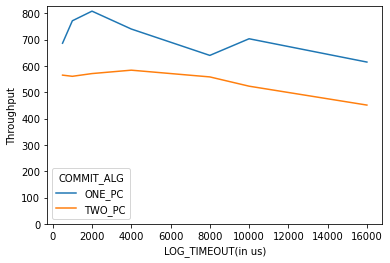

In [2]:
grouped = df.groupby(['COMMIT_ALG', 'LOG_TIMEOUT'])
newdf = grouped['Throughput'].mean().reset_index()
newdf = newdf.pivot(index='LOG_TIMEOUT', columns='COMMIT_ALG', values='Throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
plot.set_xlabel("LOG_TIMEOUT(in us)")
plot.set_ylim(bottom=0)
fig = plot.get_figure()
fig.savefig("timeout_zipf0_std_8_16.png")


In [28]:
latency = grouped['execute_phase (in us)', 'prepare_phase (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()
result = latency[latency['NUM_SERVER_THREADS'] == 16]

<ipython-input-28-f52b7dcd3b27>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase (in us)', 'prepare_phase (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()


  COMMIT_ALG  NUM_SERVER_THREADS  execute_phase (in us)  \
3     ONE_PC                  16                269.452   
8     TWO_PC                  16                227.181   

   prepare_phase (in us)  commit_phase (in us)  abort (in us)  
3               38632.84              1.398768              0  
8               36273.12          27925.780000              0  


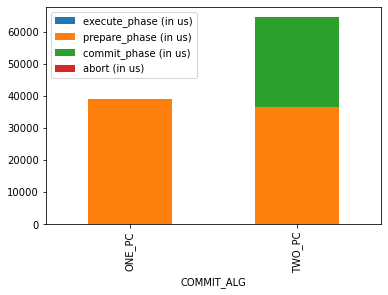

In [29]:
print(result)
result = result.drop(['NUM_SERVER_THREADS'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.savefig("latency_zipf09_std.png")